# Kaggle House Price Prob.

2018.08.04.Sat. Teddy

for Google Machine learning study

*******************************************************

## Content
### 1. Data Skimming

    1-0. Data collect
    1-1. Data load
    1-2. Data Skimming


### 2. Data Processing

    2-1. Drop
    2-2. Fill NAs
    2-3. Editing ( Adding, Editing, Binning etc..)
    
    
### 3. Model & Evaluation

    3-1 pipeline
    3-2 Model Selection & Eval
    3-3 Result
    
    
*******************************************************


In [1]:
# Adding needed libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## 1. Data Skimming

### 1-1 Data load

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

### 1-2 Data Skimming (Visualization)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
# detailed


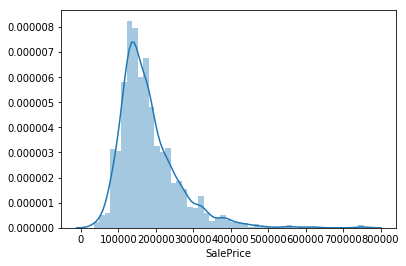

In [58]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
# 1-4 detailed Features & Relationship with variables

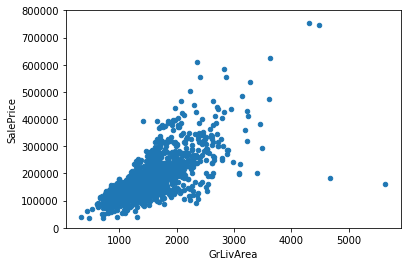

In [59]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea' ## 다른 feature들을 넣고 확인해 보면 됨, 
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [60]:
train[var].dtype # pandas , describe, dtype etc 

dtype('int64')

In [ ]:
#box plot overallqual/saleprice
## boxplot : http://www.physics.csbsju.edu/stats/box2.html
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

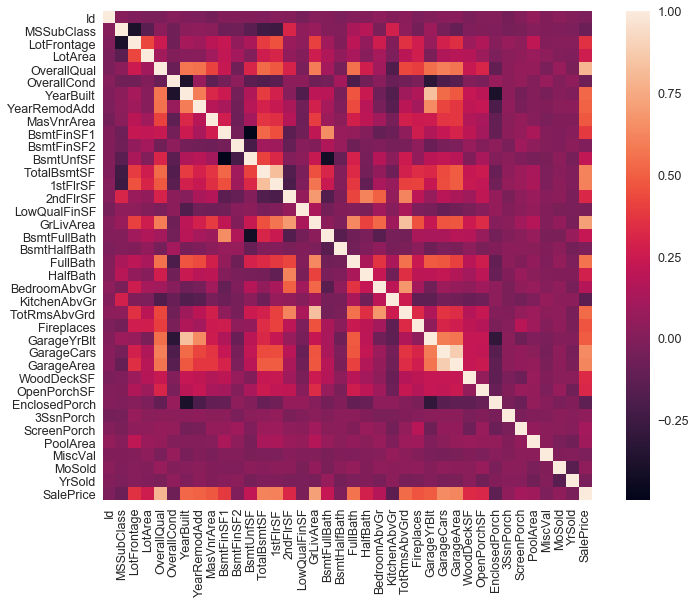

In [68]:
# Let's see at a glance

# correlation matrix
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);
## 빠져있는것들은 !


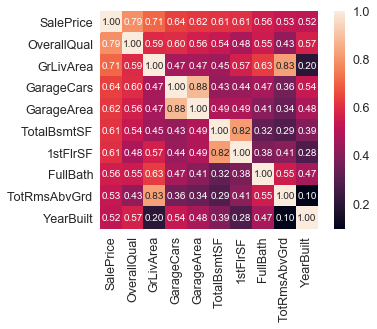

In [64]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# scatterplot
sns.set()
cols = ['SalePrice','OverallQual','GrLiveArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],size=2.5)
plt.show()

## 2. Data Processing

In [3]:
train_labels = train.pop('SalePrice')
train_labels = np.log(train_labels)
features = pd.concat([train, test], keys=['train', 'test'])

In [ ]:
sns.distplot(train_labels)

In [5]:
# pandas : https://pandas.pydata.org/pandas-docs/stable/merging.html

In [7]:
features.shape

(2919, 80)

### 2-1 drop

In [4]:
# I decided to get rid of features that have more than half of missing information or do not correlate to SalePrice
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)


In [5]:
features.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### 2-2 Fill NAs

In [6]:
# isnull?
a = features.isnull().sum()
a[a>0].sort_values(ascending=False)

Alley           2721
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
TotalBsmtSF        1
Electrical         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
GarageCars         1
SaleType           1
dtype: int64

In [7]:
# numeric
cols=["TotalBsmtSF", "GarageCars"]
for col in cols:
    features[col].fillna(0, inplace=True)

#string
cols=["Alley", "FireplaceQu", "GarageType","GarageFinish","GarageQual", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    features[col].fillna('NA', inplace=True)

#1~2개 빠진거는
cols=["MSZoning", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols:
    features[col].fillna(features[col].mode()[0], inplace=True)
    
#numeric 같은 경우
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean()) ## 

In [ ]:
# still?

### 2-3 Editing

In [8]:
# convert data type
# convert data type (categorical)
cols=['MSSubClass','OverallCond','KitchenAbvGr','YrSold','MoSold']
for col in cols:
    features[col] = features[col].astype(str)


In [9]:
k = pd.concat([features['TotalBsmtSF'],features['1stFlrSF'],features['2ndFlrSF']],keys=[1,2,3],axis=1)
k.head(10)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor full
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [10]:
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [11]:
### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)


In [12]:
# Getting Dummies from all other categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

# 3. Model & Evaluation

### 3-1 pipeline

In [13]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [14]:
### Splitting features
train_features = features.loc['train'].select_dtypes(include=[np.number]).values
test_features = features.loc['test'].select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train'].select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].select_dtypes(include=[np.number]).values

In [15]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state = 5)


In [16]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

### 3-2 Model Selection & Evaluation

In [17]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .001, .05, .5, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.001, 0.05, 0.5, 0.99], max_iter=5000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)
R2: 0.7843878461716787
RMSE: 0.16665179706492608
Test
R2: 0.8644604222427393
RMSE: 0.12688231938911312


In [18]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.13)


In [19]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.9622121754814277
RMSE: 0.07560904802785909
Test
R2: 0.9134940261894073
RMSE: 0.10203198413962677
Accuracy: 0.85 (+/- 0.05)


In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC


In [25]:
LassoTest = linear_model.LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],max_iter=5000).fit(x_train, y_train)
train_test(LassoTest, x_train, x_test, y_train, y_test)

LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=5000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)
R2: 0.8892252396074392
RMSE: 0.12516836000894435
Test
R2: 0.898879143712181
RMSE: 0.10886877817708616


In [37]:
scores = cross_val_score(LassoTest, train_features, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.13)


## Result

In [27]:
GB_model = GBest.fit(train_features, train_labels)
ENST_model = ENSTest.fit(train_features_st, train_labels)
LS_model = LassoTest.fit(train_features_st,train_labels)

In [26]:
Final_labels = (np.exp(GB_model.predict(test_features)) +
                np.exp(LS_model.predict(test_features_st)) 
                )/2

NameError: name 'LS_model' is not defined

In [23]:
Final_labels

array([118311.21808273, 146304.75716139, 182132.28000893, ...,
       155119.47980882, 121266.0097738 , 218959.7596759 ])

# Submit the result

In [24]:
## Saving to CSV
pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('18_08_04_8.csv', index =False)